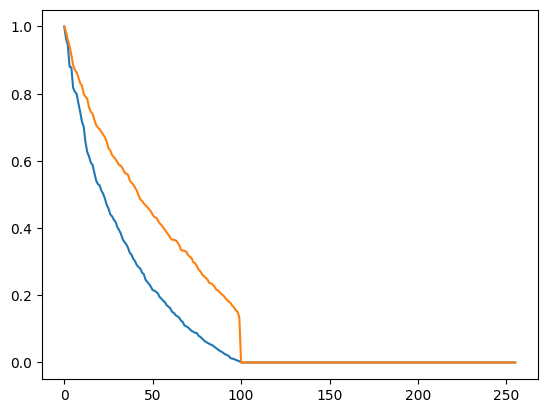

: 

In [4]:
import matplotlib.pyplot as plt
import torch
import math
# model=torch.load('/home/yiping/Downloads/wire/room_combine.pt')
# model['model'].keys()
# # model['model']['decoder.blocks.0.fc_0.weight'].shape
r=100
U = torch.empty(256,r)
V= torch.empty(r,256)
Ab = torch.empty(256,256)
Aa = torch.empty(r,r)
bound = torch.sqrt(torch.tensor(6 / 256))
diagonal_values = torch.empty(256).uniform_(-bound, bound)
Ab= torch.diag(diagonal_values)
torch.nn.init.kaiming_uniform_(U,a=math.sqrt(5))
torch.nn.init.kaiming_uniform_(V,a=math.sqrt(5))
torch.nn.init.kaiming_uniform_(Aa,a=math.sqrt(5))
torch.nn.init.kaiming_uniform_(Ab,a=math.sqrt(5))

def sv(A):
    _,s,_=torch.svd(A)
    return s/(s.max())
w=300
plt.plot(sv(w*Ab@U@Aa@V))
plt.plot(sv(U@V))


In [5]:
import torch

model=torch.load('/home/yiping/Downloads/wire/model_params.pth')

model.keys()

odict_keys(['net.0.linear.weight', 'net.0.linear.bias', 'net.1.bias', 'net.1.Aa', 'net.1.Ab', 'net.2.bias', 'net.2.Aa', 'net.2.Ab', 'net.3.bias', 'net.3.Aa', 'net.3.Ab', 'net.4.weight', 'net.4.bias'])

: 

Parameter containing:
tensor([[ 0.0049,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0148,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0043,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0666,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0547,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.0568]],
       requires_grad=True)


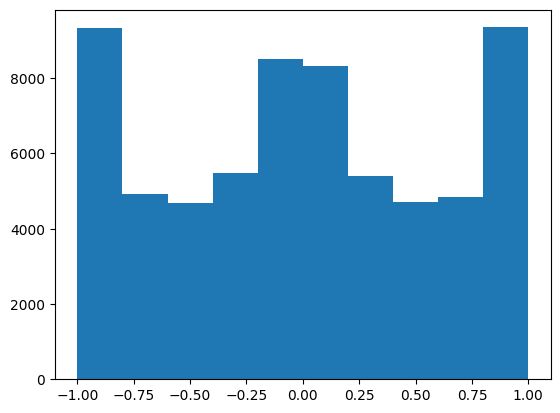

In [14]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
k=256
U = torch.empty(256,k)
V= torch.empty(k,256)
bound = torch.sqrt(torch.tensor(6 / 256))
diagonal_values_a = nn.Parameter(torch.empty(k).uniform_(-bound, bound))
Aa= nn.Parameter(torch.diag(diagonal_values_a))
diagonal_values_b = nn.Parameter(torch.empty(256).uniform_(-bound, bound))
Ab= nn.Parameter(torch.diag(diagonal_values_b))
nn.init.kaiming_uniform_(U,a=math.sqrt(5))
nn.init.kaiming_uniform_(V,a=math.sqrt(5))

plt.hist((torch.sin(10000*Ab@U@Aa@V)).flatten().detach().numpy())
print(Aa)